<a href="https://colab.research.google.com/github/OrJaku/road-sign-recognition/blob/master/road_sign_rec_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Biblioteki

In [1]:
import os, shutil, cv2, json
import pandas as pd
import numpy as np
from keras import layers, models, optimizers, metrics
from keras.preprocessing.image import ImageDataGenerator
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 


Using TensorFlow backend.


## Pliki

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/Road_sign_rec"

/content/drive/My Drive/Colab Notebooks/Road_sign_rec


In [3]:
cd "/content/drive/My Drive/Colab Notebooks/Road_sign_rec/data"

/content/drive/My Drive/Colab Notebooks/Road_sign_rec/data


In [0]:
cd '/content/data'

/content/data


In [3]:
from google.colab import files

uploaded = files.upload()

Saving Dataset_zip.zip to Dataset_zip.zip


### Kopiowanie obrazów treningowych na dysk Colab

In [4]:
cd "/content"

/content


In [0]:
try:
  os.mkdir("data")
except FileExistsError:
  pass
!cp "/content/drive/My Drive/Colab Notebooks/Road_sign_rec/Data/Dataset_zip.zip" "/content/data/Dataset_zip.zip"

In [6]:
cd data

/content/data


In [0]:
!unzip -q Dataset_zip.zip

### Przygotowanie folderów

In [0]:
base_dir = "Data/"
train_dir = os.path.join(base_dir, 'train_data')
try:
  os.mkdir(train_dir)
except FileExistsError:
  pass

cross_train =  os.path.join(train_dir, 'cross')
stop_train =  os.path.join(train_dir, 'stop')
limit50_train =  os.path.join(train_dir, 'limit50')
nosign_train =  os.path.join(train_dir, 'nosign')
try:
  os.mkdir(nosign_train)
except FileExistsError:
  pass
try:
  os.mkdir(cross_train)
except FileExistsError:
  pass
try:
  os.mkdir(stop_train)
except FileExistsError:
  pass
try:
  os.mkdir(limit50_train)
except FileExistsError:
  pass

valid_dir = os.path.join(base_dir, 'valid_data')
try:
  os.mkdir(valid_dir)
except FileExistsError:
  pass

cross_val =  os.path.join(valid_dir, 'cross')
stop_val =  os.path.join(valid_dir, 'stop')
limit50_val =  os.path.join(valid_dir, 'limit50')
nosign_val =  os.path.join(valid_dir, 'nosign')

try:
  os.mkdir(nosign_val)
except FileExistsError:
  pass
try:
  os.mkdir(cross_val)
except FileExistsError:
  pass
try:
  os.mkdir(stop_val)
except FileExistsError:
  pass
try:
  os.mkdir(limit50_val)
except FileExistsError:
  pass

test_dir = os.path.join(base_dir, 'test_data')
try:
  os.mkdir(test_dir)
except FileExistsError:
  pass

cross_test =  os.path.join(test_dir, 'cross')
stop_test =  os.path.join(test_dir, 'stop')
limit50_test =  os.path.join(test_dir, 'limit50')
limit40_test =  os.path.join(test_dir, 'limit40')
limit60_test =  os.path.join(test_dir, 'limit60')
limit70_test =  os.path.join(test_dir, 'limit70')
limit80_test =  os.path.join(test_dir, 'limit80')
limit100_test =  os.path.join(test_dir, 'limit100')

nosign_test =  os.path.join(test_dir, 'nosign')


#### Ilość poszczegónych zdjęć

In [0]:
cross_origin_path = os.path.abspath("/content/drive/My Drive/Colab Notebooks/Road_sign_rec/Data/information--pedestrians-crossing--g1/")
stop_origin_path = os.path.abspath("/content/drive/My Drive/Colab Notebooks/Road_sign_rec/Data/regulatory--stop--g1")
limit50_origin_path = os.path.abspath("/content/drive/My Drive/Colab Notebooks/Road_sign_rec/Data/regulatory--maximum-speed-limit-50--g1")
nosign_path = os.path.abspath("/content/drive/My Drive/Colab Notebooks/Road_sign_rec/Data/NoSign")
nosign_path_2 = os.path.abspath("/content/drive/My Drive/Colab Notebooks/Road_sign_rec/Data/NoSign2")



print('Przejscie dla piszych: ',len(os.listdir(cross_origin_path)))
print('Stop: ', len(os.listdir(stop_origin_path)))
print('Ograniczenie do 50km/h: ', len(os.listdir(limit50_origin_path)))
number_of_nosign = len(os.listdir(nosign_path)) + len(os.listdir(nosign_path_2))
print('Brak znaku', number_of_nosign)


#### Kopowanie i podział zdjęć na treningowe, walidacyjne i testowe

---



In [0]:

# # train cross
# for image_name in os.listdir(cross_origin_path)[0:1200]:
#   src = os.path.join(cross_origin_path, image_name)
#   dst = os.path.join(cross_train, image_name)
#   shutil.copyfile(src, dst)
# print("train cross copied")

# # validation cross
# for image_name in os.listdir(cross_origin_path)[1200:1800]:
#   src = os.path.join(cross_origin_path, image_name)
#   dst = os.path.join(cross_val, image_name)
#   shutil.copyfile(src, dst)
# print("validation cross copied")

# # test cross
# for image_name in os.listdir(cross_origin_path)[1800:]:
#   src = os.path.join(cross_origin_path, image_name)
#   dst = os.path.join(cross_test, image_name)
#   shutil.copyfile(src, dst)
# print("test cross copied")

# ##################################

# # train stop
# i=0
# for image_name in os.listdir(stop_origin_path)[0:900]:
#   i =+ 1
#   src = os.path.join(stop_origin_path, image_name)
#   dst = os.path.join(stop_train, image_name)
#   shutil.copyfile(src, dst)
#   if i == 200 or i == 400 or i == 700:
#     print(f"Copied {i} ")
# print("train stop copied")


# # validation stop
# for image_name in os.listdir(stop_origin_path)[901:1200]:
#   src = os.path.join(stop_origin_path, image_name)
#   dst = os.path.join(stop_val, image_name)
#   shutil.copyfile(src, dst)
#   if i == 1050:
#     print(f"Copied {i} ")
# print("validation stop copied")

# # test stop
# for image_name in os.listdir(stop_origin_path)[1201:]:
#   src = os.path.join(stop_origin_path, image_name)
#   dst = os.path.join(stop_test, image_name)
#   shutil.copyfile(src, dst)
#   if i == 1300:
#     print(f"Copied {i} ")
# print("test stop copied")


# ##########################

# # train limit50
# for image_name in os.listdir(limit50_origin_path)[0:400]:
#   src = os.path.join(limit50_origin_path, image_name)
#   dst = os.path.join(limit50_train, image_name)
#   shutil.copyfile(src, dst)
# print("train limit50 copied")

# # validation limit50
# for image_name in os.listdir(limit50_origin_path)[400:600]:
#   src = os.path.join(limit50_origin_path, image_name)
#   dst = os.path.join(limit50_val, image_name)
#   shutil.copyfile(src, dst)
# print("validation limit50 copied")

# # test limit50
# for image_name in os.listdir(limit50_origin_path)[600:]:
#   src = os.path.join(limit50_origin_path, image_name)
#   dst = os.path.join(limit50_test, image_name)
#   shutil.copyfile(src, dst)
# print("test limit50 copied")


# #########################


# # train NoSign
# for image_name in os.listdir(nosign_path)[0:1300]:
#   src = os.path.join(nosign_path, image_name)
#   dst = os.path.join(nosign_train, image_name)
#   shutil.copyfile(src, dst)
# print("train NoSign copied")

# # validation NoSign
# for image_name in os.listdir(nosign_path)[1300:1700]:
#   src = os.path.join(nosign_path, image_name)
#   dst = os.path.join(nosign_val, image_name)
#   shutil.copyfile(src, dst)
# print("validation NoSign copied")

# # test NoSign
# for image_name in os.listdir(nosign_path)[1700:]:
#   src = os.path.join(nosign_path, image_name)
#   dst = os.path.join(nosign_test, image_name)
#   shutil.copyfile(src, dst)
# print("test NoSign copied")


# # train NoSign2
# for image_name in os.listdir(nosign_path_2)[0:1300]:
#   src = os.path.join(nosign_path_2, image_name)
#   dst = os.path.join(nosign_train, image_name)
#   shutil.copyfile(src, dst)
# print("train NoSign2 copied")

# # validation NoSign2
# for image_name in os.listdir(nosign_path_2)[1300:1700]:
#   src = os.path.join(nosign_path_2, image_name)
#   dst = os.path.join(nosign_val, image_name)
#   shutil.copyfile(src, dst)
# print("validation NoSign2 copied")

# # test NoSign2
# for image_name in os.listdir(nosign_path_2)[1700:]:
#   src = os.path.join(nosign_path_2, image_name)
#   dst = os.path.join(nosign_test, image_name)
#   shutil.copyfile(src, dst)
# print("test NoSign2 copied")




train cross copied
validation cross copied
test cross copied
train stop copied


#### Przekształcanie plików .jpg na tensory - test

In [0]:
# datagen = ImageDataGenerator(rotation_range=40,
#                              width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              shear_range=0.2,
#                              zoom_range=0.2,
#                              horizontal_flip=True,
#                              fill_mode='nearest') 
                                  

In [0]:
# from keras.preprocessing import image

# figure = plt.figure()
# fnames = [os.path.join(cross_train, fname) for fname in os.listdir(cross_train)]
# img_path = fnames[3]
# print(img_path)
# img = image.load_img(img_path, target_size=(100, 100))
# plt.imshow(img)
# x = image.img_to_array(img)
# x = x.reshape((1,) + x.shape)
# i=1
# for batch in datagen.flow(x, batch_size=1):
#   plt.subplot(2, 3, i+0)
#   plt
#   plt.imshow(image.array_to_img(batch[0]))
#   i+=1
#   if i%5==0:
#     break

# plt.show()
# figure

In [0]:
# figure = plt.figure()
# fnames = [os.path.join(cross_train, fname) for fname in os.listdir(cross_train)]
# img_path = fnames[3]
# print(img_path)
# img = image.load_img(img_path, target_size=(100, 100))
# plt.imshow(img)
# figure

##Modele

###Przygotowanie parametrów

####Ustawienia genereatora zdjęć

In [9]:
batch_size = 64
picture_size = 100

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(picture_size,picture_size),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(picture_size,picture_size),
    batch_size=batch_size,
    class_mode='categorical'

)
number_of_classes = len(train_generator.class_indices)

Found 6948 images belonging to 9 classes.
Found 2884 images belonging to 9 classes.


####Parametry modelu

In [0]:
INIT_LR = 1e-3
epochs = 100
opt = optimizers.Adam(lr=INIT_LR, decay=INIT_LR / epochs)
METRICS = 'categorical_accuracy'
activation = 'sigmoid'

###Model multi-classes classification - własny

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(picture_size, picture_size, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.35))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.35))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(number_of_classes))
model.add(layers.Activation(activation))

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=[METRICS]
    )
# model.summary()

###Pretrained model

In [0]:
from keras.applications import VGG16
pretrain_model = VGG16(weights='imagenet',include_top=False,input_shape=(100, 100, 3))

In [0]:
model = models.Sequential()
model.add(pretrain_model)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(number_of_classes))
model.add(layers.Activation(activation))
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['acc']
    )
model.summary()

###Fit model

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=40
)

model_name = f'model_signs_9_classe_{activation}_23052020.h5'
path_to_save = "/content/drive/My Drive/Colab Notebooks/Road_sign_rec"
model_path = os.path.join(path_to_save, model_name)
model.save(model_path)

###Sprawdzenie modelu

####Przebieg uczenia 


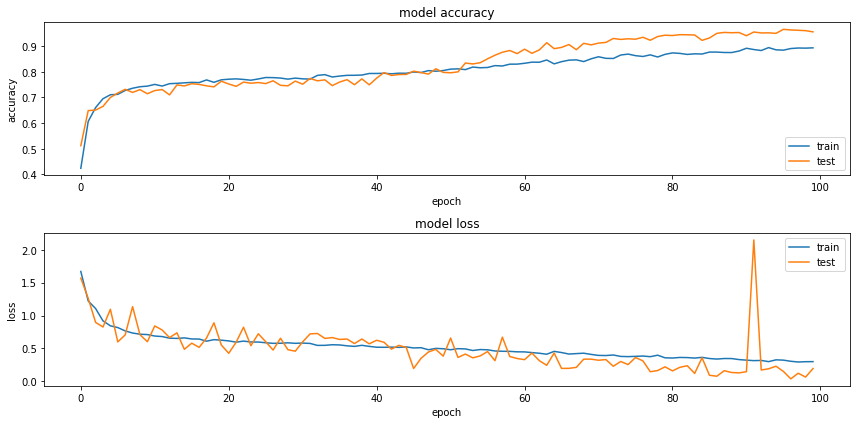

In [48]:
fig = plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()



####Testowanie modelu

In [49]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(picture_size, picture_size),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1,
        )

filenames = test_generator.filenames
classes_gen = test_generator.class_indices
loss_acc = model.evaluate(test_generator)
print(classes_gen)
print('loss= ', loss_acc[0])
print("acc= ", loss_acc[1])

Found 1737 images belonging to 9 classes.
1737/1737 [==============================] - 5s 3ms/step
{'cross': 0, 'limit100': 1, 'limit40': 2, 'limit50': 3, 'limit60': 4, 'limit70': 5, 'limit80': 6, 'nosign': 7, 'stop': 8}
loss=  4.1723259869286267e-07
acc=  0.9666091203689575


In [0]:
predict = model.predict_generator(test_generator,steps = len(filenames))
predict

array([[9.9915874e-01, 4.6842673e-13, 3.1609804e-12, 2.2462783e-11],
       [9.3389958e-01, 4.9212042e-07, 8.4070225e-06, 1.0716711e-06],
       [9.8466194e-01, 6.9712502e-09, 6.0307585e-08, 1.9771484e-08],
       ...,
       [1.5384682e-09, 1.2227581e-11, 1.4416462e-11, 9.9999988e-01],
       [4.7219624e-03, 7.7082851e-04, 1.3636227e-01, 6.2290853e-01],
       [6.9285288e-06, 5.3450655e-08, 1.8193723e-06, 9.9975032e-01]],
      dtype=float32)

In [50]:
signs = test_generator.class_indices
for sign in signs:
  files = os.path.join(test_dir, sign)
  test_files = os.listdir(files)
  incorrect = 0
  for f in test_files:
    path_to_test = os.path.join(files, f)
    img = cv2.imread(path_to_test)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(picture_size,picture_size))
    img = img.astype("float32") / 255
    img_tensor = np.reshape(img,[1,picture_size,picture_size,3])
    classes = (model.predict_classes(img_tensor)).tolist()
    for num, class_ in enumerate(signs):
      if classes[0] == num:
        classes = list(signs.keys())[list(signs.values()).index(num)]
    else:
      classes
    if classes != sign:
      incorrect += 1 
  print(f'{sign}: {incorrect} / {len(test_files)},  Correct: {round(100-(incorrect/len(test_files)*100))}%')


cross: 4 / 388,  Correct: 99%
limit100: 9 / 20,  Correct: 55%
limit40: 5 / 98,  Correct: 95%
limit50: 8 / 111,  Correct: 93%
limit60: 10 / 65,  Correct: 85%
limit70: 5 / 34,  Correct: 85%
limit80: 10 / 41,  Correct: 76%
nosign: 4 / 813,  Correct: 100%
stop: 4 / 167,  Correct: 98%


###Zapis modelu i wag

In [0]:
model_name_json = 'model_5conv.json'
model_path = os.path.join(base_dir, model_name_json)
json_config = model.to_json()
with open(model_path, 'w') as json_file:
    json_file.write(json_config)

In [0]:
model_name = 'model_signs_4_classes.h5'
model_path = os.path.join(base_dir, model_name)
model.save(model_path)

In [0]:
model_name = 'model_signs_4_multi_classes_softmax.h5'
model_path = os.path.join(base_dir, model_name)
model.save(model_path)

In [0]:
model_name = 'model_signs_4_multi_classes_sigmoid.h5'
model_path = os.path.join(base_dir, model_name)
model.save(model_path)

In [0]:
model.load_weights('/content/drive/My Drive/Colab Notebooks/Road_sign_rec/Data/model_signs_4_multi_classes_softmax.h5')

In [0]:
figure = plt.figure()
files = os.path.join(test_dir, 'cross')
test_files = os.listdir(files)
path_to_test = os.path.join(files, test_files[100])
img = cv2.imread(path_to_test)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(picture_size,picture_size))
plt.imshow(img)
plt.show()
figure

###Poprzednie wyniki do porównania

In [0]:
last sigmoi:
new drop
limit50: 0 / 111,  Correct: 100%
stop: 4 / 167,  Correct: 98%
cross: 9 / 388,  Correct: 98%
nosign: 4 / 780,  Correct: 99%

vgg:
limit50: 0 / 111,  Correct: 100%
stop: 6 / 167,  Correct: 96%
cross: 11 / 388,  Correct: 97%
nosign: 17 / 780,  Correct: 98%

limit50: 0 / 111,  Correct: 100%
stop: 5 / 167,  Correct: 97%
cross: 6 / 388,  Correct: 98%
nosign: 10 / 729,  Correct: 99%

limit50: 8 / 111,  Correct: 93%
stop: 7 / 167,  Correct: 96%
cross: 45 / 388,  Correct: 88%
nosign: 24 / 729,  Correct: 97%

last softmax:
new drop
limit50: 4 / 111,  Correct: 96%
stop: 13 / 167,  Correct: 92%
cross: 14 / 388,  Correct: 96%
nosign: 6 / 780,  Correct: 99%

vgg:
limit50: 2 / 111,  Correct: 98%
stop: 5 / 167,  Correct: 97%
cross: 8 / 388,  Correct: 98%
nosign: 3 / 780,  Correct: 100%


##Detekcja wideo

###Pliki i ścieżki

In [0]:
video_path_input_directory = '/content/drive/My Drive/Colab Notebooks/Road_sign_rec/Input'
video_file_name = 'warsaw_drive_test.mp4'
video_path_file = os.path.join(video_path_input_directory, video_file_name)
video_path_output = '/content/drive/My Drive/Colab Notebooks/Road_sign_rec/Output'
print(video_path_file)
from google.colab.patches import cv2_imshow

/content/drive/My Drive/Colab Notebooks/Road_sign_rec/Input/warsaw_drive_test.mp4


In [0]:
  ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
  cap = cv2.VideoCapture(video_path_file)
  video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  cap_video_fps = int(cap.get(cv2.CAP_PROP_FPS))
  cap_video_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  cap_video_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  print("FPS", cap_video_fps)
  print("Length", video_length)
  writer = None
  (W, H) = (None, None)
  mean = np.array([100, 100, 100], dtype="float32")
  i = 0
  while True:
      i += 1
      print(f'{i} / {video_length}')
      (grabbed, frame) = cap.read()
      if not grabbed:
          break
      if W is None or H is None:
          (H, W) = frame.shape[:2]
      output = frame.copy()
      ss.setBaseImage(output)
      try:
        ss.switchToSelectiveSearchFast()
      except cv2.error:
        break
      ssresults = ss.process()
      for w, result in enumerate(ssresults):
          if w < 2000:
              x, y, w, h = result
              timage = output[y:y+h, x:x+w]
              resized = cv2.resize(timage, (100, 100), interpolation=cv2.INTER_AREA)
              resized = resized - mean
              img = np.expand_dims(resized, axis=0)
              out = model.predict(img/255.0, batch_size=10)
              if out[0][0] >= 0.99:
                  cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
      if writer is None:
          fourcc = cv2.VideoWriter_fourcc(*"MJPG")
          writer = cv2.VideoWriter('Output/out_video.mp4', 
                                   fourcc, 
                                   30,
                                   (W, H), 
                                   True,
                                   )
      writer.write(output)
      cv2_imshow(output)
  print("__END__")